In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading csv file
data=pd.read_csv("train-chennai-sale.csv")
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
#Dropping unneccesary columns
data.drop(["REG_FEE","COMMIS","PRT_ID"],axis=1,inplace=True)

In [5]:
data["sale_date"]=data["DATE_SALE"].apply(lambda x:x[6:])

In [7]:
data["build_date"]=data["DATE_BUILD"].apply(lambda x:x[6:])

In [8]:
data.shape

(7109, 21)

In [9]:
age=[]
for i in range(data.shape[0]):
    m=int(data["sale_date"][i])-int(data["build_date"][i])
    age.append(m)
data["age"]=age

In [10]:
data.drop(["DATE_BUILD","DATE_SALE"],axis=1,inplace=True)

In [11]:
data

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,sale_date,build_date,age
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,2011,1962,49
7105,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,2004,1995,9
7106,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,2006,1978,28
7107,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,2009,1977,32


In [ ]:
#Data cleaning and univariant analysis

In [12]:
data["AREA"].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Ana Nagar        3
Karapakam        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [13]:
data["AREA"]=data["AREA"].replace({"Chrompt":"Chrompet","Chormpet":"Chrompet","Chrmpet":"Chrompet","TNagar":"T Nagar","Ana Nagar":"Anna Nagar","Karapakam":"Karapakkam","Ann Nagar":"Anna Nagar","Velchery":"Velachery","Adyr":"Adyar","KKNagar":"KK Nagar"})

In [14]:
data["AREA"].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AREA', ylabel='count'>

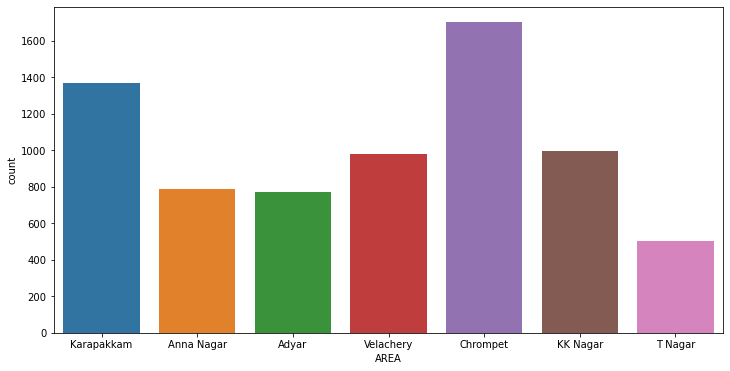

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data["AREA"])

In [16]:
data.isnull().sum()

AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
sale_date         0
build_date        0
age               0
dtype: int64

In [17]:
data.dropna(inplace=True)

In [18]:
data

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,sale_date,build_date,age
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,2011,1962,49
7105,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,2004,1995,9
7106,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,2006,1978,28
7107,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,2009,1977,32


In [19]:
data["SALE_COND"].value_counts()

AdjLand        1426
Normal Sale    1416
Partial        1414
AbNormal       1396
Family         1390
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64

In [20]:
data["SALE_COND"]=data["SALE_COND"].replace({"Adj Land":"AdjLand","Ab Normal":"AbNormal","Partiall":"Partial","PartiaLl":"Partial"})

In [21]:
data["SALE_COND"].value_counts()

AdjLand        1432
Partial        1417
Normal Sale    1416
AbNormal       1401
Family         1390
Name: SALE_COND, dtype: int64

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALE_COND', ylabel='count'>

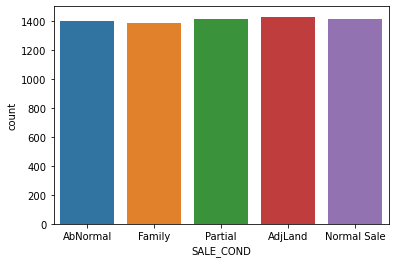

In [22]:
sns.countplot(data["SALE_COND"])

In [23]:
data["PARK_FACIL"].value_counts()

Yes    3557
No     3498
Noo       1
Name: PARK_FACIL, dtype: int64

In [24]:
data["PARK_FACIL"]=data["PARK_FACIL"].replace({"Noo":"No"})

In [25]:
data["PARK_FACIL"].value_counts()

Yes    3557
No     3499
Name: PARK_FACIL, dtype: int64

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PARK_FACIL', ylabel='count'>

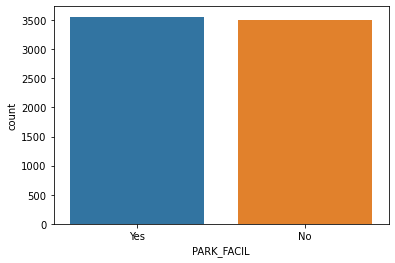

In [26]:
sns.countplot(data["PARK_FACIL"])

In [27]:
data["BUILDTYPE"].value_counts()

House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: BUILDTYPE, dtype: int64

In [28]:
data["BUILDTYPE"]=data["BUILDTYPE"].replace({"Other":"Others","Comercial":"Commercial"})

In [29]:
data["BUILDTYPE"].value_counts()

House         2433
Others        2312
Commercial    2311
Name: BUILDTYPE, dtype: int64

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BUILDTYPE', ylabel='count'>

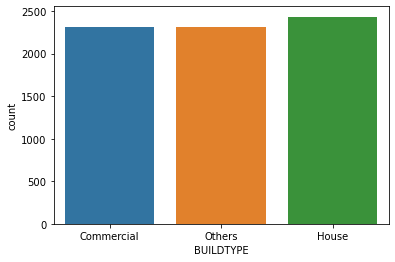

In [30]:
sns.countplot(data["BUILDTYPE"])

In [31]:
data["UTILITY_AVAIL"].value_counts()

AllPub     1874
NoSeWa     1860
NoSewr     1812
ELO        1509
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [32]:
data["UTILITY_AVAIL"]=data["UTILITY_AVAIL"].replace({"All Pub":"AllPub"})

In [33]:
data["UTILITY_AVAIL"].value_counts()

AllPub     1875
NoSeWa     1860
NoSewr     1812
ELO        1509
Name: UTILITY_AVAIL, dtype: int64

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='count'>

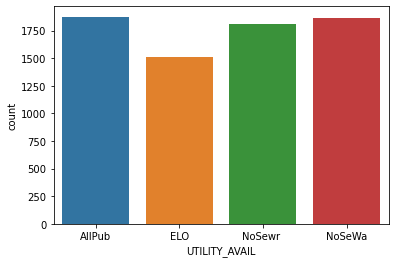

In [34]:
sns.countplot(data["UTILITY_AVAIL"])

In [35]:
data["STREET"].value_counts()

Paved        2542
Gravel       2502
No Access    1993
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [36]:
data["STREET"]=data["STREET"].replace({"Pavd":"Paved","NoAccess":"No Access"})

In [37]:
data["STREET"].value_counts()

Paved        2554
Gravel       2502
No Access    2000
Name: STREET, dtype: int64

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STREET', ylabel='count'>

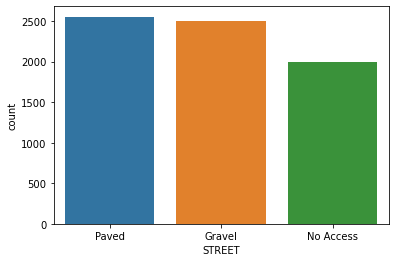

In [38]:
sns.countplot(data["STREET"])

In [39]:
data["MZZONE"].value_counts()

RL    1849
RH    1808
RM    1801
C      547
A      533
I      518
Name: MZZONE, dtype: int64

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MZZONE', ylabel='count'>

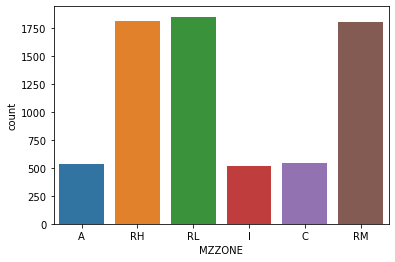

In [40]:
sns.countplot(data["MZZONE"])

In [ ]:
#checking outliers in the countinuous features using boxplot

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INT_SQFT'>

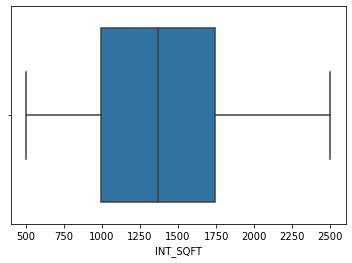

In [41]:
sns.boxplot(data["INT_SQFT"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIST_MAINROAD'>

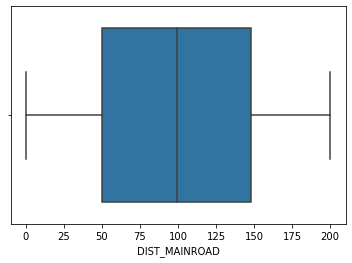

In [42]:
sns.boxplot(data["DIST_MAINROAD"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='N_BEDROOM'>

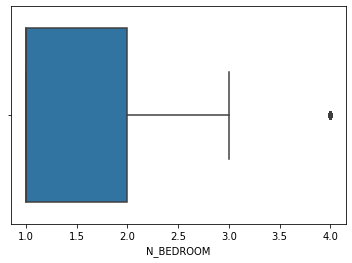

In [43]:
sns.boxplot(data["N_BEDROOM"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='N_BATHROOM'>

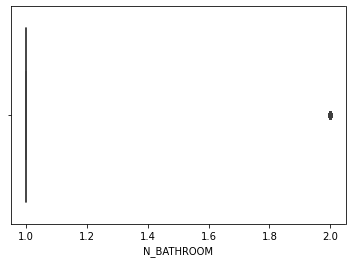

In [44]:
sns.boxplot(data["N_BATHROOM"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='N_ROOM'>

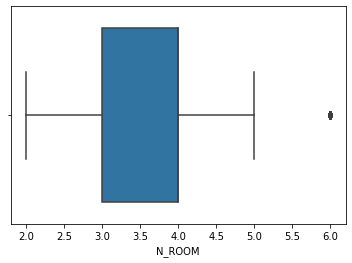

In [45]:
sns.boxplot(data["N_ROOM"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

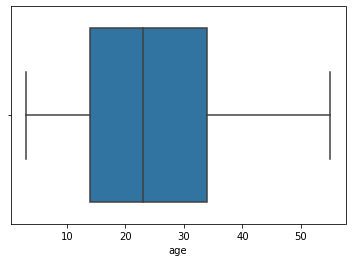

In [46]:
sns.boxplot(data["age"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALES_PRICE'>

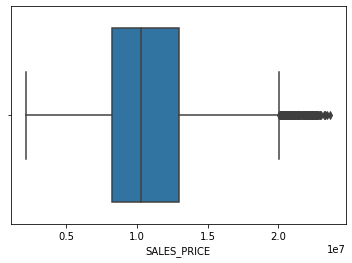

In [47]:
sns.boxplot(data["SALES_PRICE"])

C:\Users\preth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALES_PRICE', ylabel='Density'>

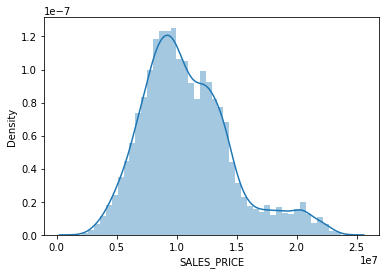

In [49]:
sns.distplot(data["SALES_PRICE"])

In [ ]:
#Bi-Variant analysis

<AxesSubplot:xlabel='AREA', ylabel='SALES_PRICE'>

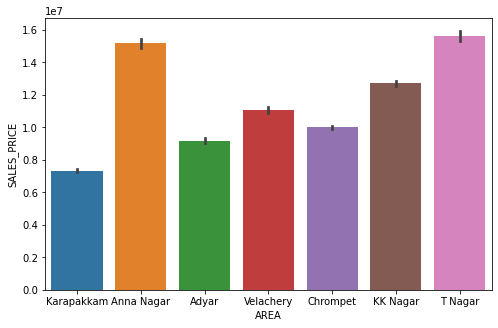

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(x="AREA", y="SALES_PRICE", data=data)

<AxesSubplot:xlabel='SALE_COND', ylabel='SALES_PRICE'>

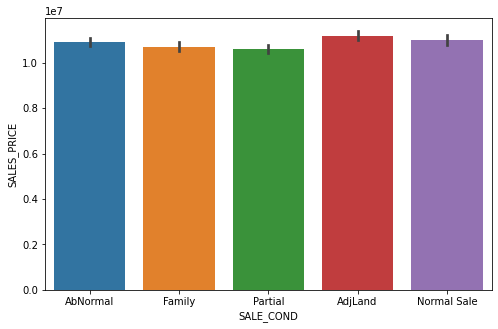

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(x="SALE_COND", y="SALES_PRICE", data=data)

<AxesSubplot:xlabel='PARK_FACIL', ylabel='SALES_PRICE'>

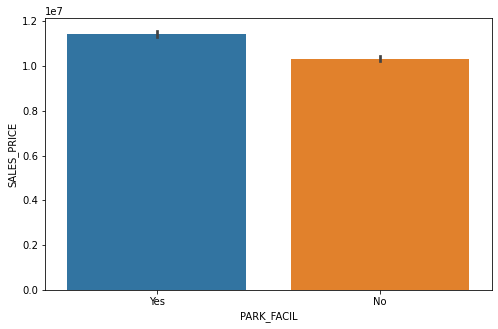

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(x="PARK_FACIL", y="SALES_PRICE", data=data)

<AxesSubplot:xlabel='BUILDTYPE', ylabel='SALES_PRICE'>

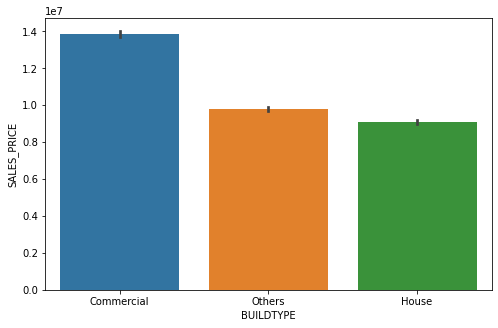

In [53]:
plt.figure(figsize=(8,5))
sns.barplot(x="BUILDTYPE", y="SALES_PRICE", data=data)

<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='SALES_PRICE'>

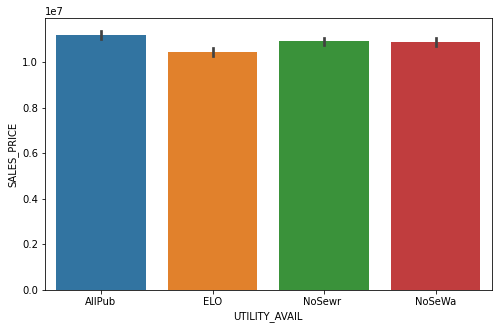

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(x="UTILITY_AVAIL", y="SALES_PRICE", data=data)

<AxesSubplot:xlabel='STREET', ylabel='SALES_PRICE'>

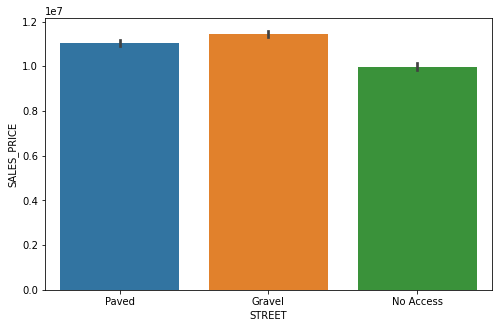

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(x="STREET", y="SALES_PRICE", data=data)

<AxesSubplot:xlabel='MZZONE', ylabel='SALES_PRICE'>

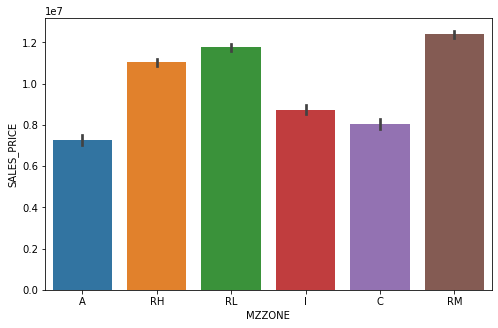

In [56]:
plt.figure(figsize=(8,5))
sns.barplot(x="MZZONE", y="SALES_PRICE", data=data)

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

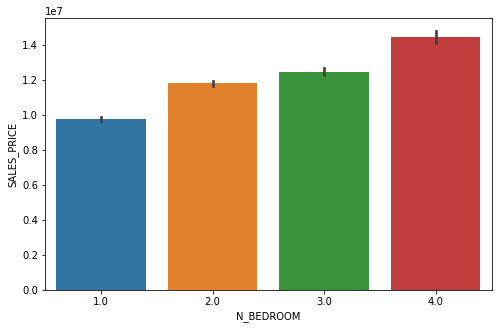

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(x="N_BEDROOM", y="SALES_PRICE", data=data)

<AxesSubplot:xlabel='N_ROOM', ylabel='SALES_PRICE'>

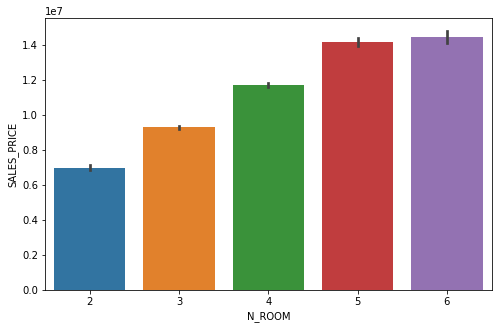

In [58]:
plt.figure(figsize=(8,5))
sns.barplot(x="N_ROOM", y="SALES_PRICE", data=data)

<AxesSubplot:xlabel='N_BATHROOM', ylabel='SALES_PRICE'>

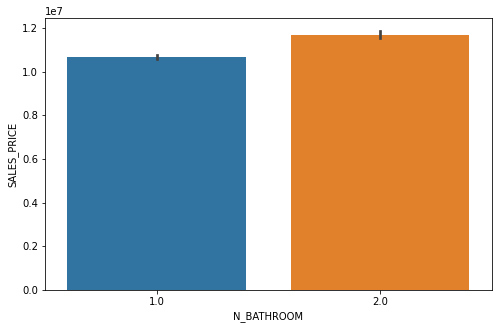

In [59]:
plt.figure(figsize=(8,5))
sns.barplot(x="N_BATHROOM", y="SALES_PRICE", data=data)

<AxesSubplot:xlabel='age', ylabel='SALES_PRICE'>

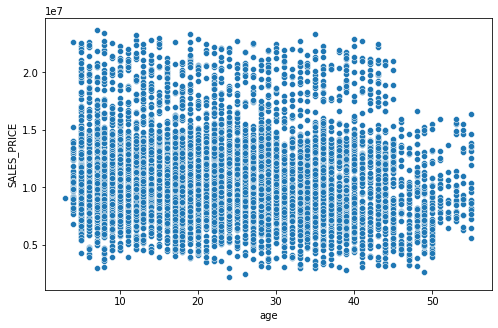

In [60]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="age", y="SALES_PRICE", data=data)

<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

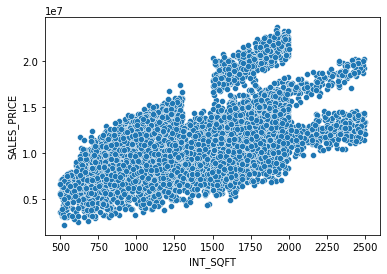

In [61]:
sns.scatterplot(data=data, x="INT_SQFT", y="SALES_PRICE")

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

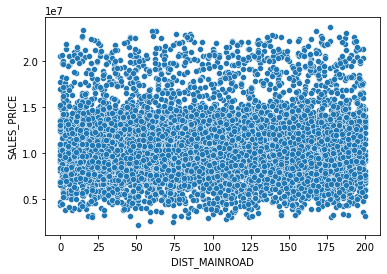

In [62]:
sns.scatterplot(data=data, x="DIST_MAINROAD", y="SALES_PRICE")

In [63]:
data.drop(["sale_date","build_date"],axis=1,inplace=True)

In [64]:
data.drop(["QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL"],axis=1,inplace=True)

In [65]:
c=["AREA","SALE_COND","PARK_FACIL","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE"]
new=pd.get_dummies(data,columns=["AREA","SALE_COND","PARK_FACIL","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE"])
new

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALES_PRICE,age,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1.0,1.0,3,7600000,44,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,21717770,11,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,13159200,20,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,9630290,22,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,1226,84,1.0,1.0,3,7406250,30,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,5353000,49,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7105,1897,52,3.0,2.0,5,10818480,9,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7106,1614,152,2.0,1.0,4,8351410,28,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7107,787,40,1.0,1.0,2,8507000,32,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [77]:
x=new.drop("SALES_PRICE",axis=1)
y=new["SALES_PRICE"]

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [85]:
m=[]
n=[i for i in x.columns]
acc=[]
for i in x.columns:
    a=new[[i]]
    b=new["SALES_PRICE"]
    model=LinearRegression()
    model.fit(a,b)
    m.append(np.mean(cross_val_score(model,a,b)))
    acc.append(model.score(a,b))
h=pd.DataFrame({"Features":n,"cross_val_score":m,"Accuracy":acc})
h.sort_values("cross_val_score",ascending=False)
    

,Features,cross_val_score,Accuracy
0,INT_SQFT,0.373719,3.753621e-01
4,N_ROOM,0.362341,3.641119e-01
20,BUILDTYPE_Commercial,0.301150,3.044824e-01
10,AREA_Karapakkam,0.210512,2.114240e-01
7,AREA_Anna Nagar,0.159533,1.598423e-01
11,AREA_T Nagar,0.116912,1.189205e-01
21,BUILDTYPE_House,0.116845,1.189018e-01
2,N_BEDROOM,0.109177,1.106197e-01
30,MZZONE_A,0.073740,7.504467e-02
35,MZZONE_RM,0.054267,5.495395e-02


<AxesSubplot:>

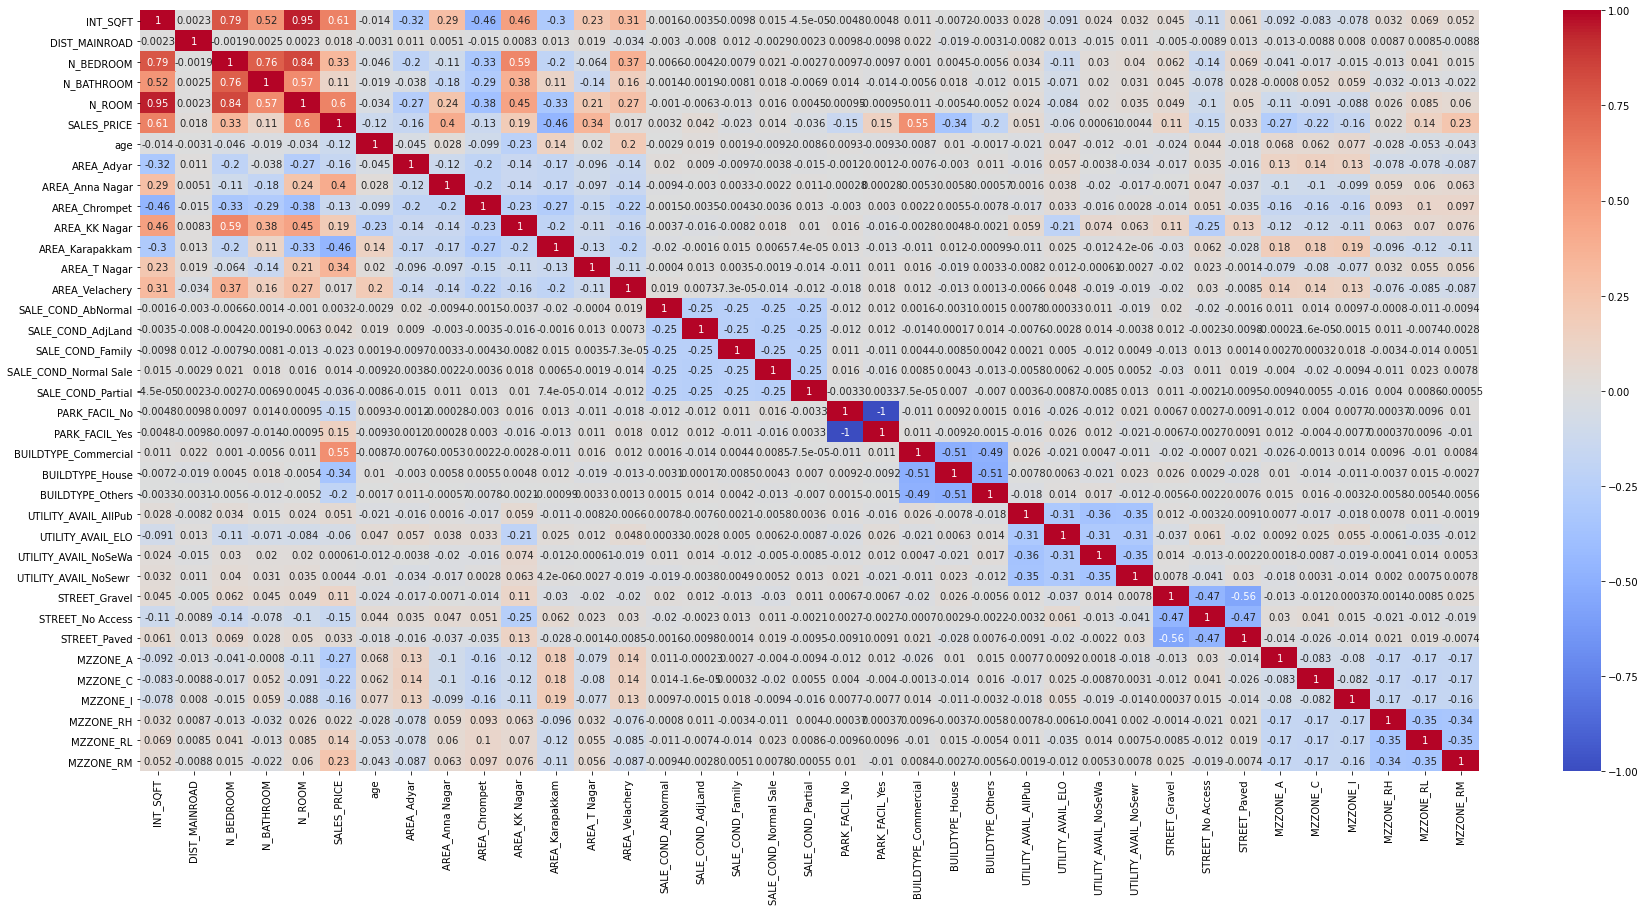

In [89]:
plt.figure(figsize=(30,14))
sns.heatmap(new.corr(),annot=True,cmap="coolwarm")

In [138]:
def trained_model(x):
    lr=x
    lr.fit(x_train,y_train)
    print(str(x)[:-2])
    print("R2 score : ",lr.score(x_test,y_test))
    print("Cross_val_score :",np.mean(cross_val_score(lr,x_train,y_train)))

In [139]:
trained_model(LinearRegression())

LinearRegression
R2 score :  0.9552751573598188
Cross_val_score : 0.9580943358445104


In [140]:
trained_model(DecisionTreeRegressor())

DecisionTreeRegressor
R2 score :  0.9663431767216933
Cross_val_score : 0.9608563919546815


In [141]:
trained_model(XGBRegressor())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=Non
R2 score :  0.9953142995435745
Cross_val_score : 0.994684627463873
